In [1]:
from urllib.request import Request, urlopen

import json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

import datasets

In [2]:
# fetch data
headers = {'user-agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.149 Safari/537.36'}
req = Request('https://thevirustracker.com/timeline/map-data.json', headers=headers)
with urlopen(req) as res:
    data = json.load(res)

In [3]:
# obtain country mapping
# import bs4
# from bs4 import BeautifulSoup

# req = Request('https://thevirustracker.com/api',
#               headers=headers)
# with urlopen(req) as res:
#      html = res.read().decode('utf-8')
# soup = BeautifulSoup(html, 'html.parser')
# result = soup.find('tbody')
# country_map = {child.a.string[:2]: child.td.contents[-1].strip() for child in result.find_all('tr')}

m = pd.read_csv('data/virus_tracker_mapping.txt', sep='\t',
                names=['country', 'countrycode', '_'], usecols=['country', 'countrycode'])
m['country'] = m['country'].str[3:]
m['countrycode'] = m['countrycode'].str[:2]
m.rename(columns=str.title, inplace=True)
m.set_index('Countrycode', inplace=True)

In [4]:
df = pd.DataFrame(data['data'])
countrycodes = set(df['countrycode'])
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%y')
df.rename(columns=str.title)
df.sort_values(['countrycode', 'date'], inplace=True)
df.rename(columns=str.title, inplace=True)
df.set_index(['Countrycode', 'Date'] , inplace=True)
df = df.applymap(int)

In [5]:
colors = ['tab:orange', 'tab:red', 'tab:green']

def draw_timeline(countrycode):
    fig, ax = plt.subplots(figsize=(9, 6))
    data = df.loc[countrycode]
    c, d, r = np.squeeze(data.last('1D').values)
    for (label, content), color, i in zip(data.iteritems(), colors, [0, 0, 5 if (d-r)/(r++1e-10) <= 0.15 else -5]):
        ax.plot(content, label=label, color=color)
        ax.annotate(content[-1], xy=(ax.get_xticks()[-1], content[-1]),
                    xycoords=ax.transData, xytext=(0, i), textcoords='offset points',
                    va='center', ha='left', fontsize=8)
    ax.set_title('{}'.format(countrycode))
    ax.get_xaxis().set_major_formatter(mpl.dates.DateFormatter('%m-%d'))
    ax.grid()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.legend()
    plt.savefig('./country_timeline/{}.png'.format(countrycode))

In [6]:
for countrycode in countrycodes:
    draw_timeline(countrycode)
    plt.close()

In [37]:
pd.read_csv('time_series_covid19_confirmed_global.txt').groupby('Country/Region').sum().index[36]

'China'

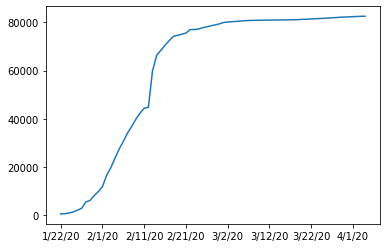

In [39]:
pd.read_csv('time_series_covid19_confirmed_global.txt').groupby('Country/Region').sum().iloc[36, 2:].plot()